#  `Predicting house pricing in Bengaluru `

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\Arvind\Favorites\Downloads\Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## area_type availability and society doesnot making so much difference on price so we remove all these form dataset

In [4]:
df.drop(['area_type','availability','society'],axis='columns',inplace=True)

In [5]:
df[df.balcony==3.0 ][df.bath==4.0].head()

<ipython-input-5-467a91385d43>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.balcony==3.0 ][df.bath==4.0].head()


,location,size,total_sqft,bath,balcony,price
308,Begur,4 BHK,1664,4.0,3.0,65.0
323,Akshaya Vana,4 Bedroom,1200,4.0,3.0,165.0
439,Kasavanhalli,3 Bedroom,1000,4.0,3.0,110.0
440,Whitefield,4 Bedroom,11890,4.0,3.0,700.0
455,Chikkabidarakallu,4 Bedroom,3309,4.0,3.0,325.0


In [6]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df.sort_values('bath',ascending=False)

,location,size,total_sqft,bath,balcony,price
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.00
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.00
11559,1Kasavanhalli,18 Bedroom,1200,18.0,NaN,200.00
3379,1Hanuman Nagar,19 BHK,2000,16.0,NaN,490.00
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,NaN,550.00
...,...,...,...,...,...,...
11496,Kanakpura Road,1 BHK,525,NaN,NaN,27.00
11569,Hosur Road,NaN,1350,NaN,NaN,8.44
12768,Bettahalsoor,5 Bedroom,3210,NaN,NaN,353.00
12861,KR Puram,4 BHK,2204 - 2362,NaN,NaN,121.00


In [8]:
df.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df.balcony.fillna(0,inplace=True)

In [10]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [11]:
df1=df.dropna()
df1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [12]:
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [13]:
df1['bhk']=df1['size'].apply(lambda x:int(x.split(' ')[0]))

<ipython-input-13-d5855e2eec26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bhk']=df1['size'].apply(lambda x:int(x.split(' ')[0]))


In [14]:
df1

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,0.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [15]:
def fun(x):
    try:
        float(x)
    except:
        return False
    return True


In [16]:
df1[~df1['total_sqft'].apply(fun)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,0.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4


In [17]:
def fun1(x):
    no=x.split('-')
    if len(no)==2:
        return (float(no[0])+float(no[1]))//2
    try:
        return float(x)
    except:
        return None

In [18]:
df2=df1.copy()

In [19]:
df2['total_sqft']=df2['total_sqft'].apply(fun1)

In [20]:
df2

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,0.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4


In [21]:
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [22]:
df3=df2.copy()

In [23]:
df3['price_per_sqft']=df3.price*100000/df3.total_sqft

In [24]:
df3

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,0.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


In [25]:
len(df3.location.unique())

1304

In [26]:
location_df=df3.location.value_counts()
location_df

Whitefield               534
Sarjapur  Road           392
Electronic City          302
Kanakpura Road           266
Thanisandra              233
                        ... 
1 Giri Nagar               1
 Sector 1 HSR Layout       1
Reliable Woods Layout      1
Tippenahalli               1
D Souza Layout             1
Name: location, Length: 1304, dtype: int64

In [27]:
location_10=location_df[location_df<=10]
len(location_10)

1063

In [28]:
df4=df3.copy()
df4.location=df4.location.apply(lambda x:x.strip())
df4.head()
len(df4.location.unique())

1293

In [29]:
df4.location=df4.location.apply(lambda x:'other' if x  in location_10 else x)

In [30]:
len(df4.location.unique())

271

In [31]:
df4

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,0.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


# outlier removal

#  1 bhk require atleat 300 sqft area

In [32]:
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,0.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,0.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000


In [33]:
df5=df4[df4.total_sqft/df4.bhk>300]

In [34]:
df5

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,0.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


In [35]:
 df5.price_per_sqft.describe()

count     12274.000000
mean       6211.891273
std        4053.211112
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

# Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation



In [36]:
import numpy as np

In [37]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(9987, 8)

# Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

In [38]:
import matplotlib
import matplotlib.pyplot as plt

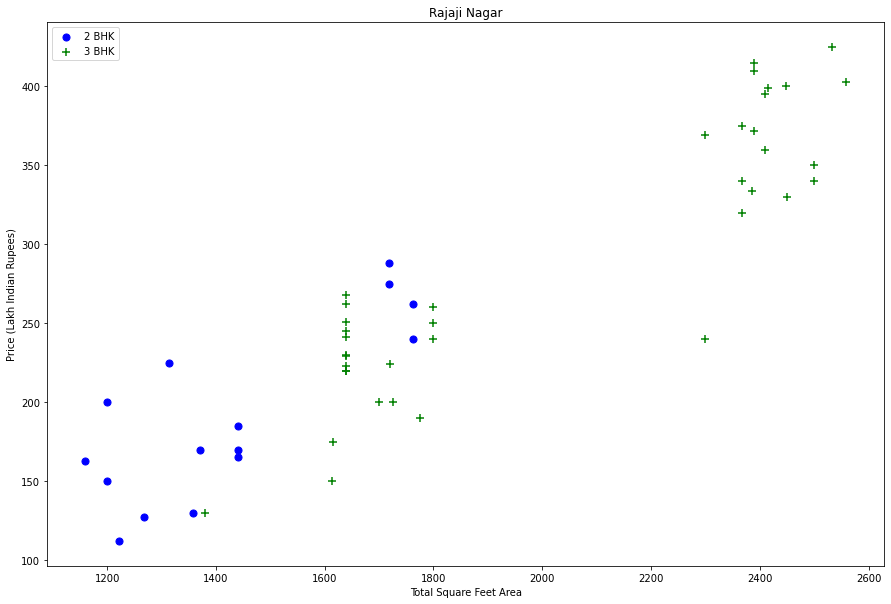

In [39]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")

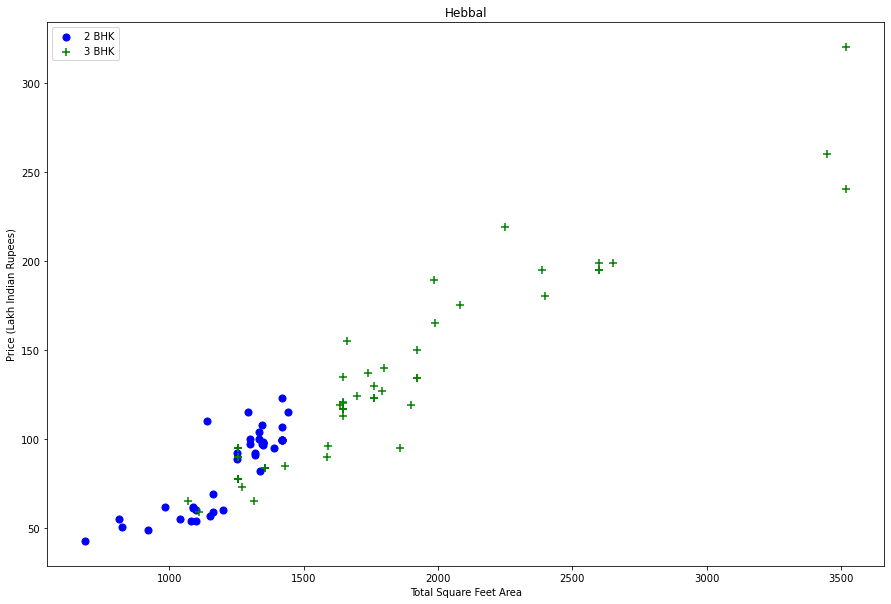

In [40]:
plot_scatter_chart(df6,"Hebbal")


In [41]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
# df8 = df7.copy()
df7.shape

(7143, 8)

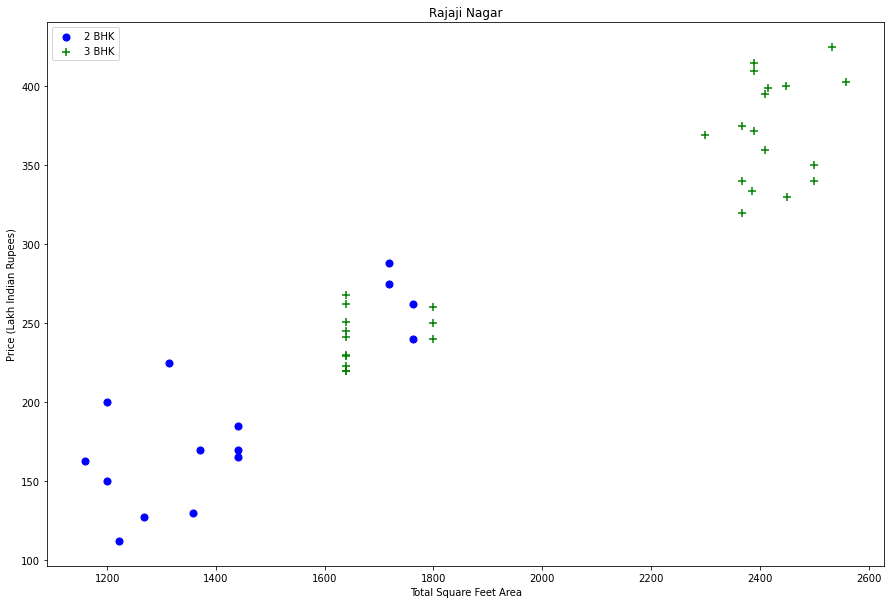

In [42]:
plot_scatter_chart(df7,"Rajaji Nagar")

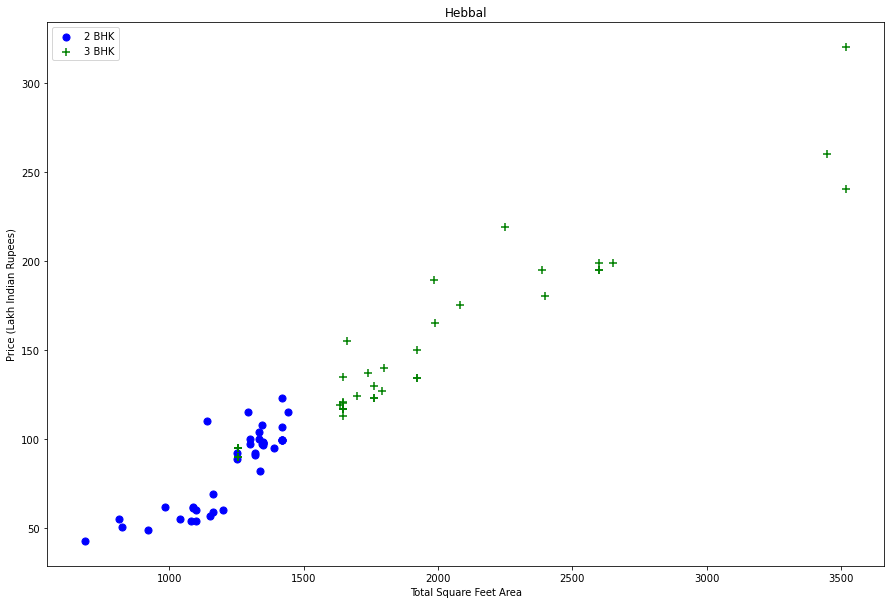

In [43]:
plot_scatter_chart(df7,"Hebbal")

Text(0, 0.5, 'Count')

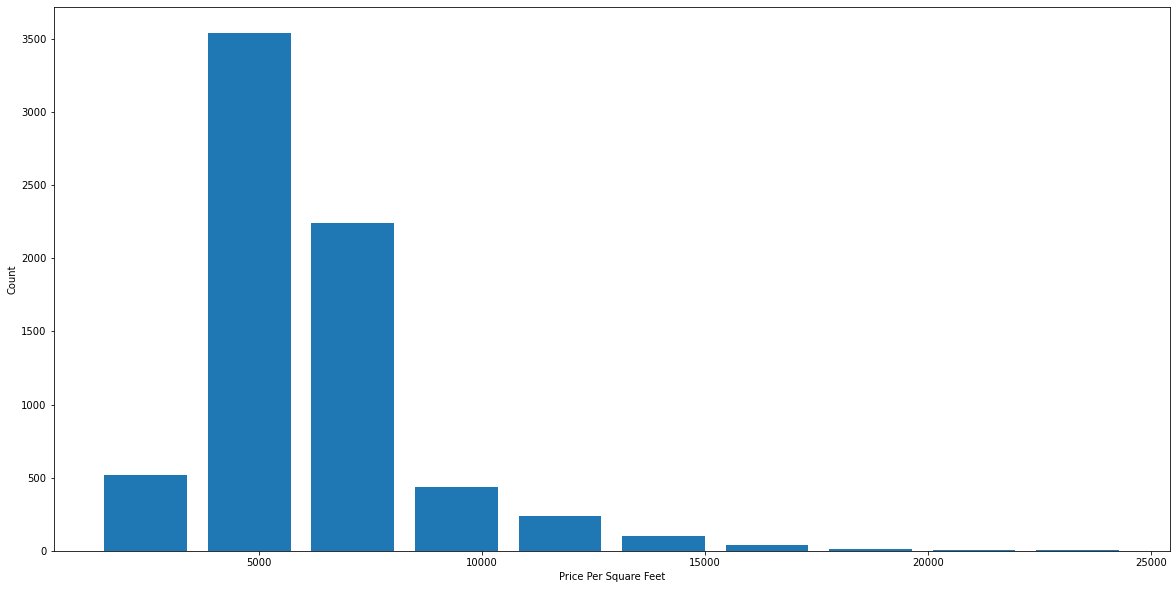

In [44]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [45]:
df.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

Text(0, 0.5, 'Count')

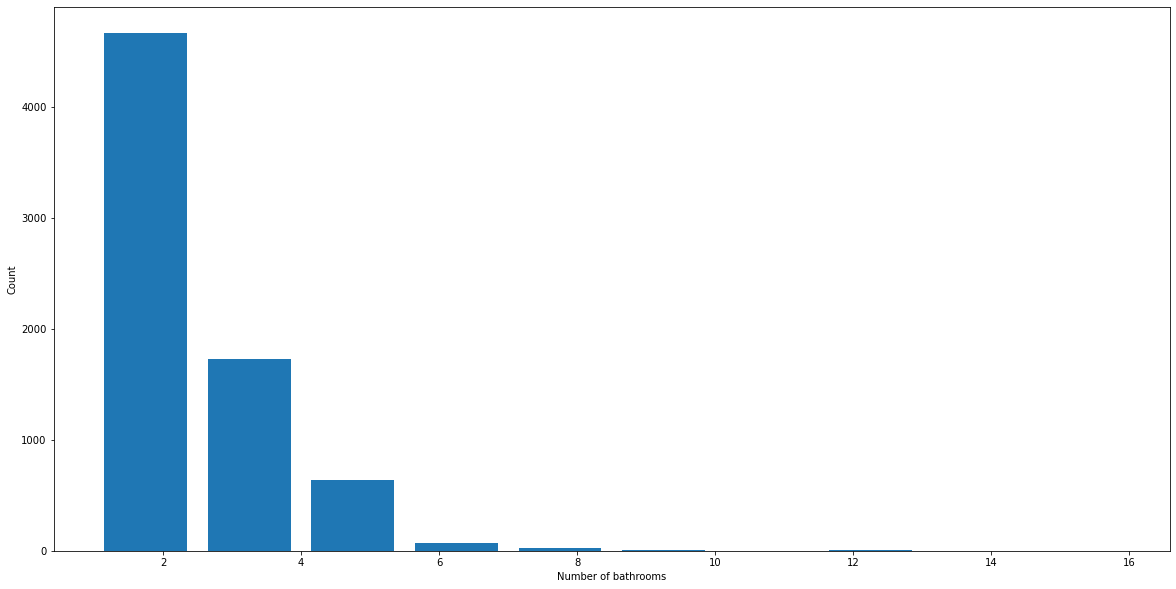

In [46]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [47]:
df7[df7.bath>df7.bhk+2]


,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1565,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
5096,Nagasandra,4 Bedroom,7000.0,8.0,0.0,450.0,4,6428.571429
6569,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8238,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [48]:
df8=df7.copy()
df7.shape

(7143, 8)

In [49]:
df8=df7[df7.bath<df7.bhk+2]

In [50]:
df8.shape
df8.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


In [51]:
df9=df8.copy()

In [52]:
df9.drop(['size','balcony','price_per_sqft'],axis='columns',inplace=True)

In [53]:
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [54]:
df9.shape

(7067, 5)

#  now create dummies using one hot encoding 

In [55]:
df10=pd.get_dummies(df9,drop_first=True)

In [56]:
df10.shape

(7067, 257)

In [57]:
df10.head()

,total_sqft,bath,price,bhk,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Vittasandra,location_Whitefield,"location_Whitefield,",location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other,location_south
0,2850.0,4.0,428.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
x=df10.drop('price',axis='columns')
y=df10.price

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [61]:
from  sklearn.decomposition import PCA

In [62]:
pca=PCA()

In [63]:
import numpy as np

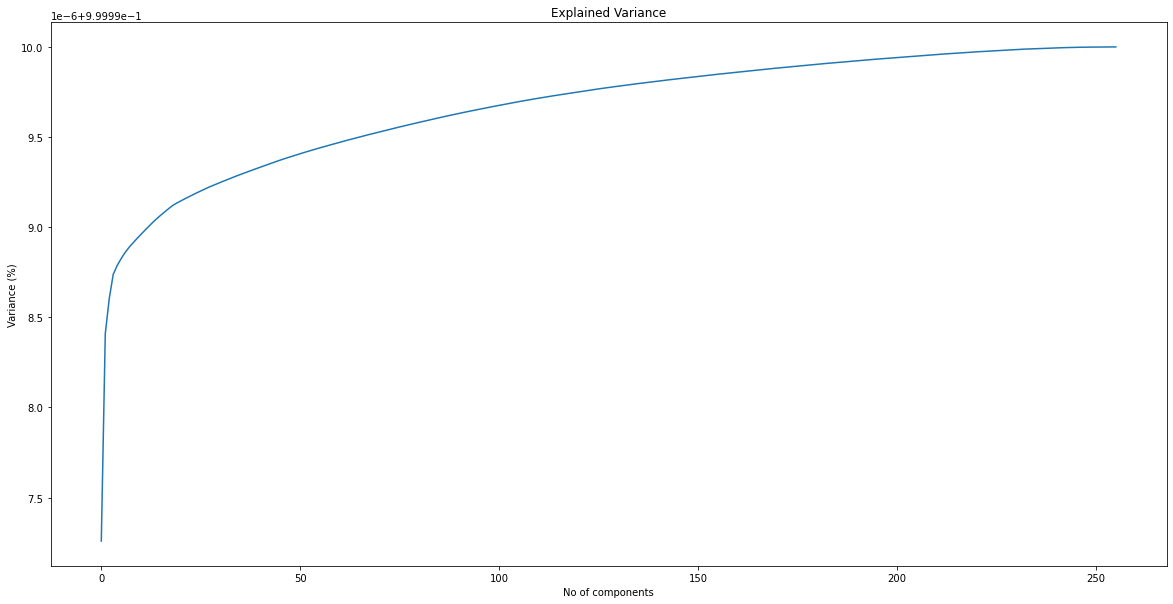

In [64]:
princ=pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

#  Machine learning

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
dtr=DecisionTreeRegressor()

In [71]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [72]:
dtr.score(x_test,y_test)

0.8628567459083318

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
rf=RandomForestRegressor()

In [75]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [76]:
rf.score(x_test,y_test)`

0.8688055961072134

In [85]:
y_pred=rf.predict(x_test)

In [90]:
y_pred=pd.Series(y_pred)

In [97]:
import joblib

In [98]:
joblib.dump(rf,'house_pricing.joblib')

['house_pricing.joblib']

In [99]:
new_=joblib.load('house_pricing.joblib')

In [100]:
new_.score(x_test,y_test)

0.8688055961072134

# here RandomForestClassifier giving good accuracy so i select it as final model